In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from pathlib import Path

In [2]:
CURRENT_DIR = Path.cwd()

In [3]:
filepath = os.path.join(CURRENT_DIR, "S03_residual_stress_merge.xlsx")
dfm = pd.read_excel(filepath).rename(
    columns={"Sigma(x)": "sigma_x_pre", "FWHM": "FWHM_pre"}
)
dfm


,idx_excel_post,section,sample_no,location,R,W,D,sigma_x_post,FWHM_post,idx_excel_pre,sigma_x_pre,FWHM_pre,diff_sigma_x
0,4,AA5052,1,1,1400,60,10,13,2.55,2,-15,2.50,28
1,25,AA5052,2,1,1400,60,15,16,2.51,9,2,2.47,14
2,46,AA5052,3,1,1400,60,20,19,2.47,16,9,2.48,10
3,67,AA5052,4,1,1400,70,10,20,2.45,23,10,2.48,10
4,88,AA5052,5,1,1400,70,15,6,2.47,30,0,2.49,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1050,Center,50,7,1600,70,15,2,2.45,0,0,0.00,2
1131,1071,Center,51,7,1600,70,20,2,2.45,0,0,0.00,2
1132,1092,Center,52,7,1600,80,10,5,2.54,0,0,0.00,5
1133,1113,Center,53,7,1600,80,15,1,2.41,0,0,0.00,1


Text(0.5, 1.0, 'Pre-weld Residual Stress Distribution by Location and Section')

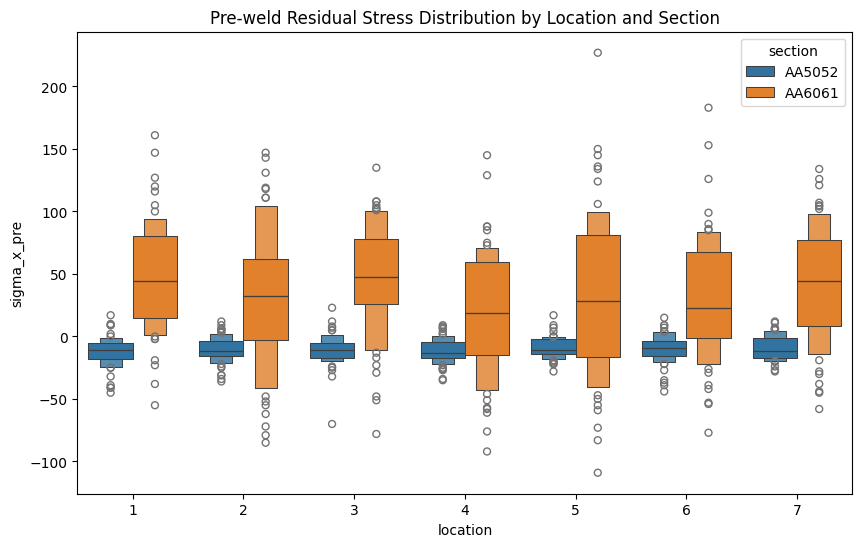

In [4]:
# Plot boxenplot of pre-weld residual stress by location and section
filt = dfm["section"].isin(["AA5052", "AA6061"])
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(dfm[filt], x="location", y="sigma_x_pre", hue="section", ax=ax)
ax.set_title("Pre-weld Residual Stress Distribution by Location and Section")

Text(0.5, 1.0, 'Post-weld Residual Stress Distribution by Location and Section')

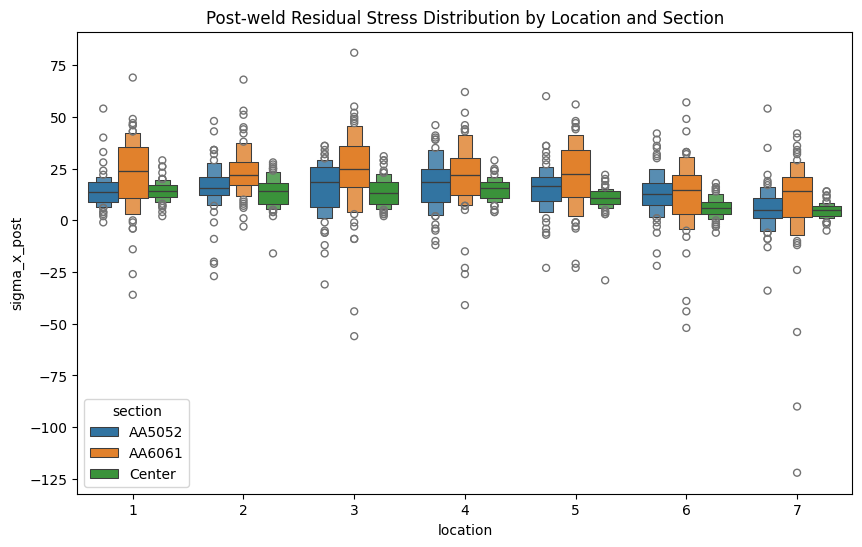

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(dfm, x="location", y="sigma_x_post", hue="section", ax=ax)
ax.set_title("Post-weld Residual Stress Distribution by Location and Section")

In [6]:
dfm.columns

Index(['idx_excel_post', 'section', 'sample_no', 'location', 'R', 'W', 'D',
       'sigma_x_post', 'FWHM_post', 'idx_excel_pre', 'sigma_x_pre', 'FWHM_pre',
       'diff_sigma_x'],
      dtype='object')

In [7]:
dfm_melt = dfm.melt(
    id_vars=["section", "sample_no", "location"],
    value_vars=["sigma_x_pre", "sigma_x_post"],
    var_name="weld_status",
    value_name="residual_stress",
)
dfm_melt

,section,sample_no,location,weld_status,residual_stress
0,AA5052,1,1,sigma_x_pre,-15
1,AA5052,2,1,sigma_x_pre,2
2,AA5052,3,1,sigma_x_pre,9
3,AA5052,4,1,sigma_x_pre,10
4,AA5052,5,1,sigma_x_pre,0
...,...,...,...,...,...
2265,Center,50,7,sigma_x_post,2
2266,Center,51,7,sigma_x_post,2
2267,Center,52,7,sigma_x_post,5
2268,Center,53,7,sigma_x_post,1


Text(0.5, 1.0, 'Residual Stress Distribution by Location and Weld Status for AA5052')

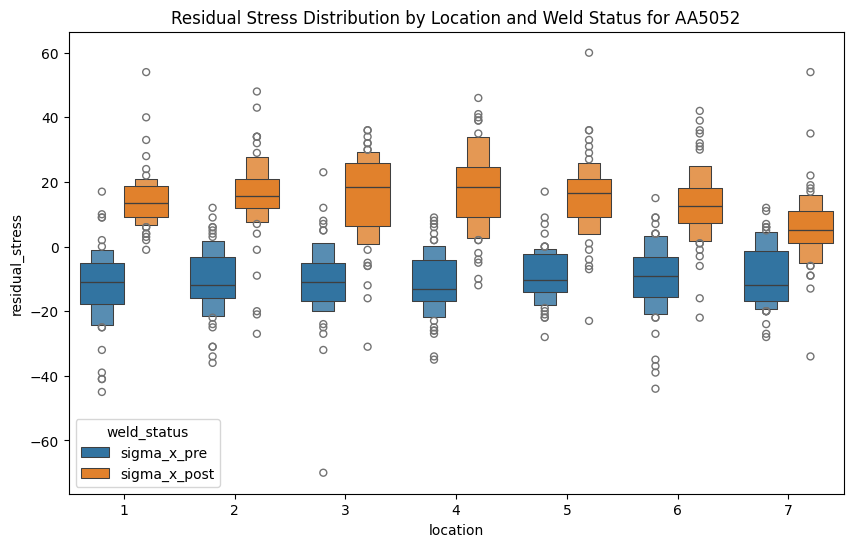

In [8]:
filt = dfm_melt["section"].isin(["AA5052"])
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(dfm_melt[filt], x="location", y="residual_stress", hue="weld_status", ax=ax)
ax.set_title("Residual Stress Distribution by Location and Weld Status for AA5052")

Text(0.5, 1.0, 'Residual Stress Distribution by Location and Weld Status for AA6061')

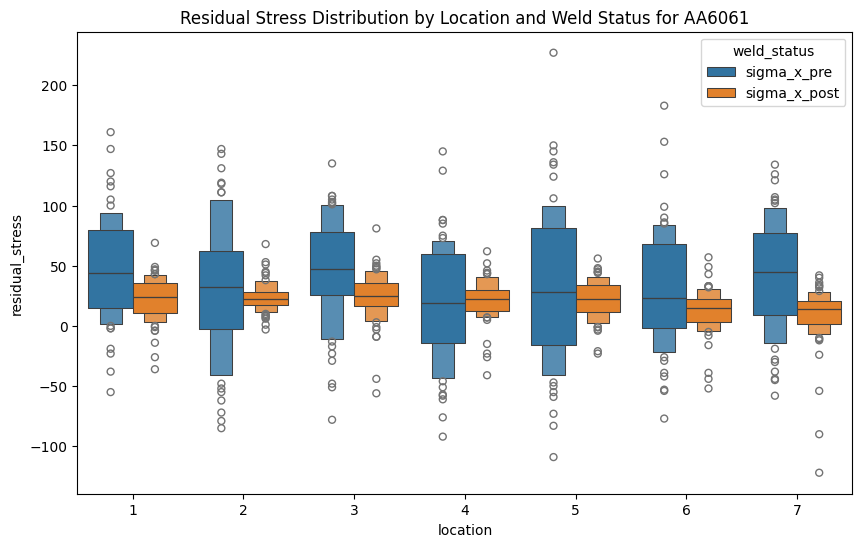

In [9]:
filt = dfm_melt["section"].isin(["AA6061"])
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(dfm_melt[filt], x="location", y="residual_stress", hue="weld_status", ax=ax)
ax.set_title("Residual Stress Distribution by Location and Weld Status for AA6061")

Text(0.5, 1.0, 'Difference in Residual Stress by Location and Section')

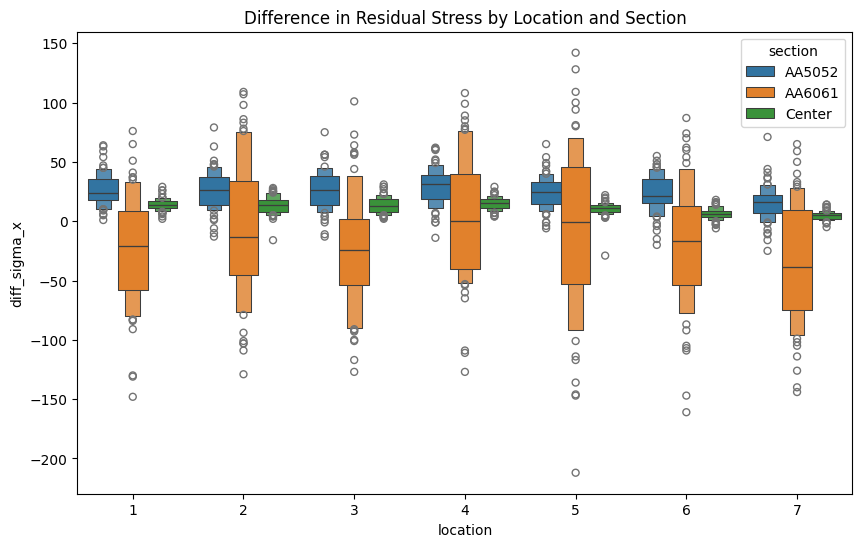

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(dfm, x="location", y="diff_sigma_x", hue="section", ax=ax)
ax.set_title("Difference in Residual Stress by Location and Section")

Text(0.5, 1.0, 'Difference in Residual Stress by Location and Section for Center')

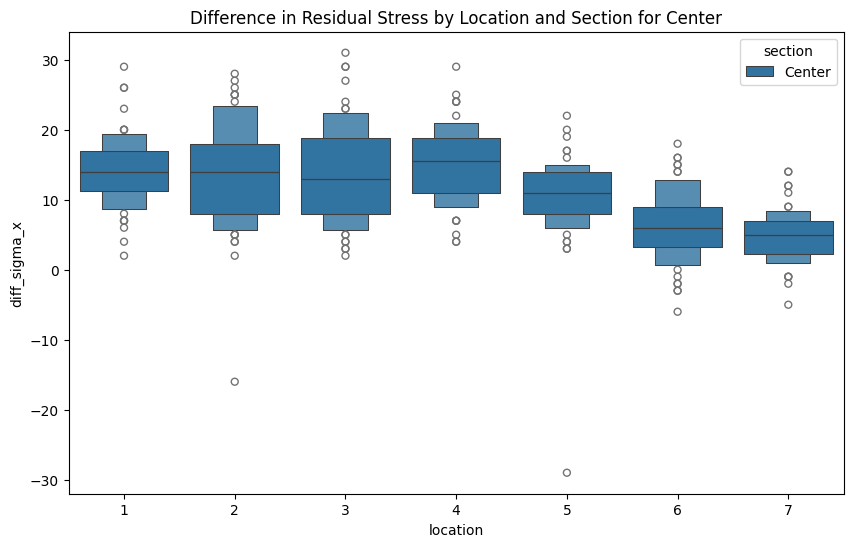

In [11]:
filt = dfm["section"].isin(["Center"])
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(dfm[filt], x="location", y="diff_sigma_x", hue="section", ax=ax)
ax.set_title("Difference in Residual Stress by Location and Section for Center")

In [12]:
dfm_melt2 = dfm.melt(
    id_vars=["section", "sample_no", "location"],
    value_vars=["FWHM_pre", "FWHM_post"],
    var_name="weld_status",
    value_name="FWHM_value",
)
dfm_melt2

,section,sample_no,location,weld_status,FWHM_value
0,AA5052,1,1,FWHM_pre,2.50
1,AA5052,2,1,FWHM_pre,2.47
2,AA5052,3,1,FWHM_pre,2.48
3,AA5052,4,1,FWHM_pre,2.48
4,AA5052,5,1,FWHM_pre,2.49
...,...,...,...,...,...
2265,Center,50,7,FWHM_post,2.45
2266,Center,51,7,FWHM_post,2.45
2267,Center,52,7,FWHM_post,2.54
2268,Center,53,7,FWHM_post,2.41


Text(0.5, 1.0, 'Pre-weld FWHM Distribution by Location and Section')

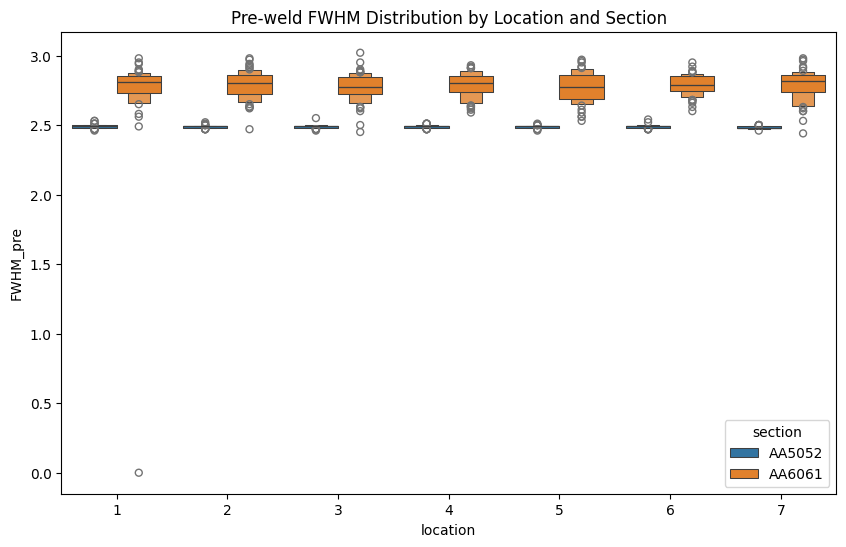

In [13]:
filt = dfm["section"].isin(["AA5052", "AA6061"])
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(dfm[filt], x="location", y="FWHM_pre", hue="section", ax=ax)
ax.set_title("Pre-weld FWHM Distribution by Location and Section")

Text(0.5, 1.0, 'Post-weld FWHM Distribution by Location and Section')

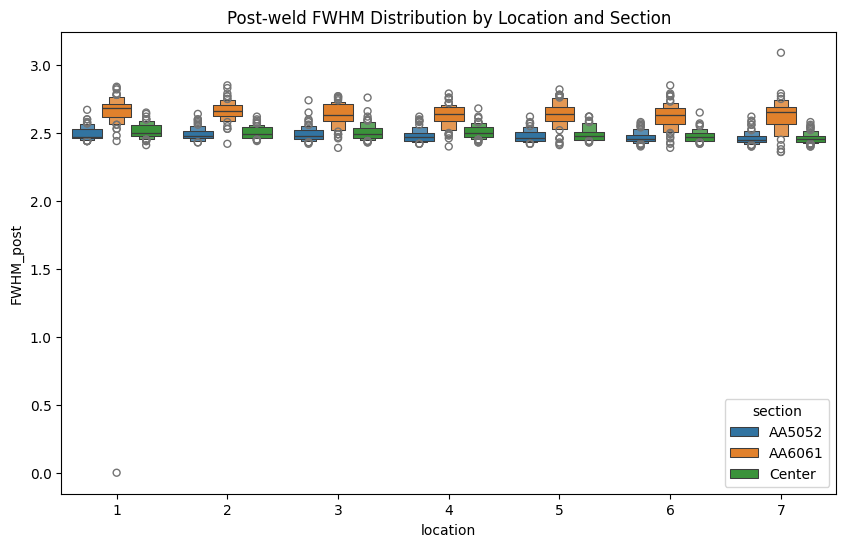

In [14]:
filt = dfm["section"].notna()
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(dfm[filt], x="location", y="FWHM_post", hue="section", ax=ax)
ax.set_title("Post-weld FWHM Distribution by Location and Section")

Text(0.5, 1.0, 'FWHM Distribution by Location and Section for AA5052')

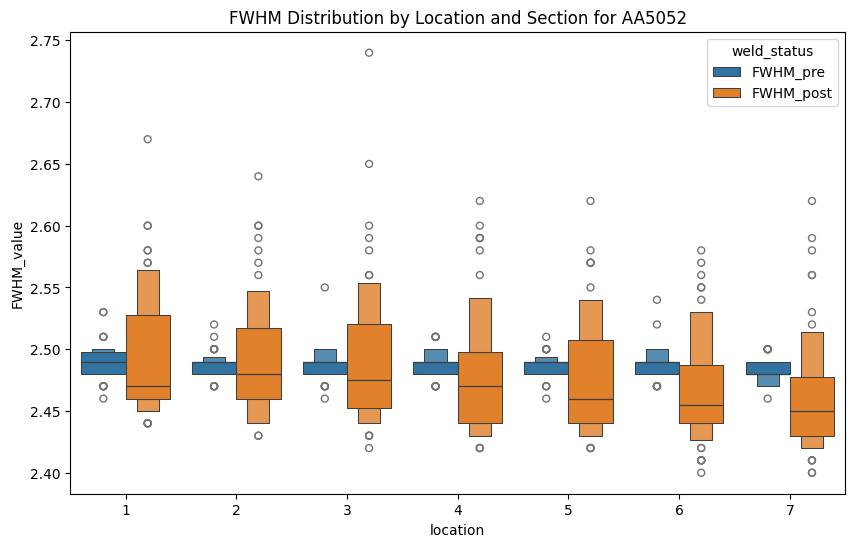

In [15]:
filt = dfm_melt2["section"].isin(["AA5052"])
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(dfm_melt2[filt], x="location", y="FWHM_value", hue="weld_status", ax=ax)
ax.set_title("FWHM Distribution by Location and Section for AA5052")

Text(0.5, 1.0, 'FWHM Distribution by Location and Section for AA6061')

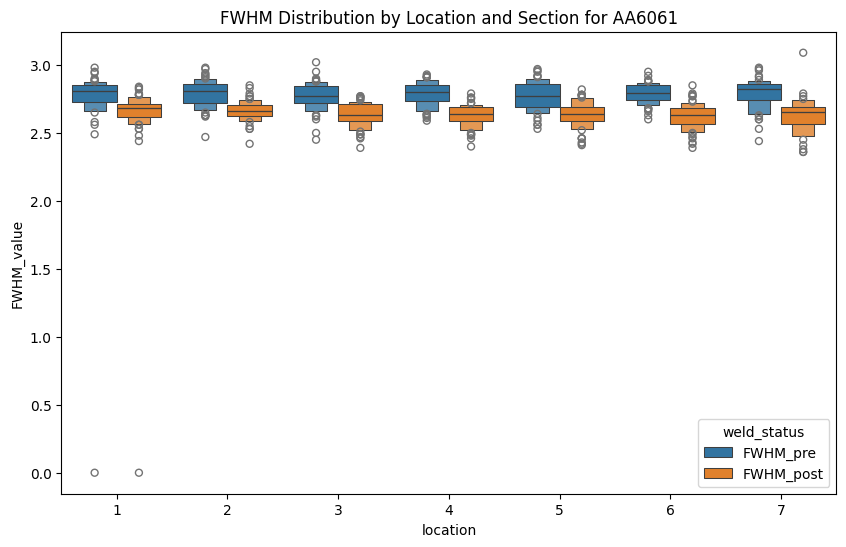

In [16]:
filt = dfm_melt2["section"].isin(["AA6061"])
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(dfm_melt2[filt], x="location", y="FWHM_value", hue="weld_status", ax=ax)
ax.set_title("FWHM Distribution by Location and Section for AA6061")